In [1]:
import random
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline
import seaborn as sns
import warnings
import plotly.express as px

In [4]:
train = pd.read_csv('data/train_ozone.csv')
test = pd.read_csv('data/test_ozone.csv')
submission = pd.read_csv('submission/submission.csv')

In [6]:
train.shape, test.shape, submission.shape

((1459, 11), (715, 10), (715, 2))

In [5]:
train.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

<AxesSubplot:>

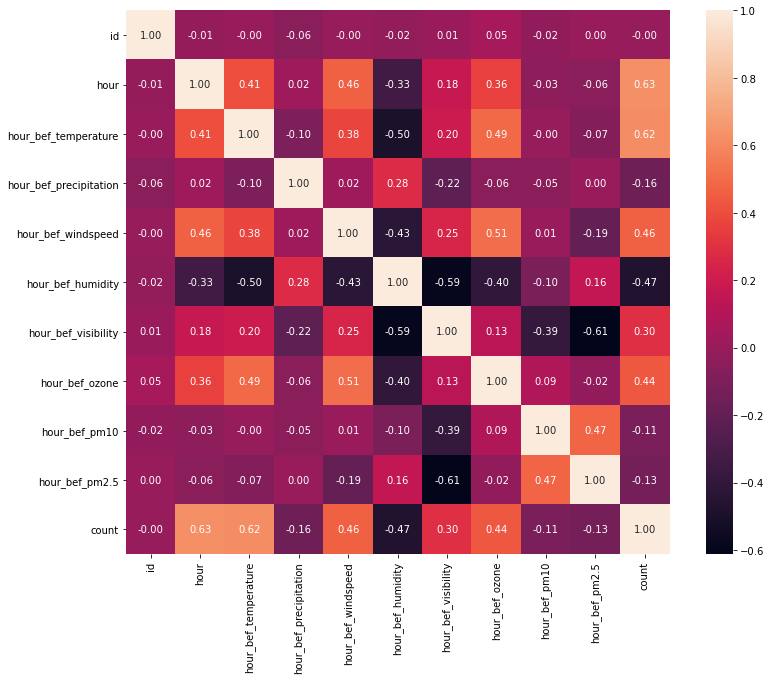

In [7]:
train_corr = train.corr()
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(train_corr, annot=True, fmt = '.2f', square=True)

<AxesSubplot:xlabel='hour_bef_pm2.5', ylabel='count'>

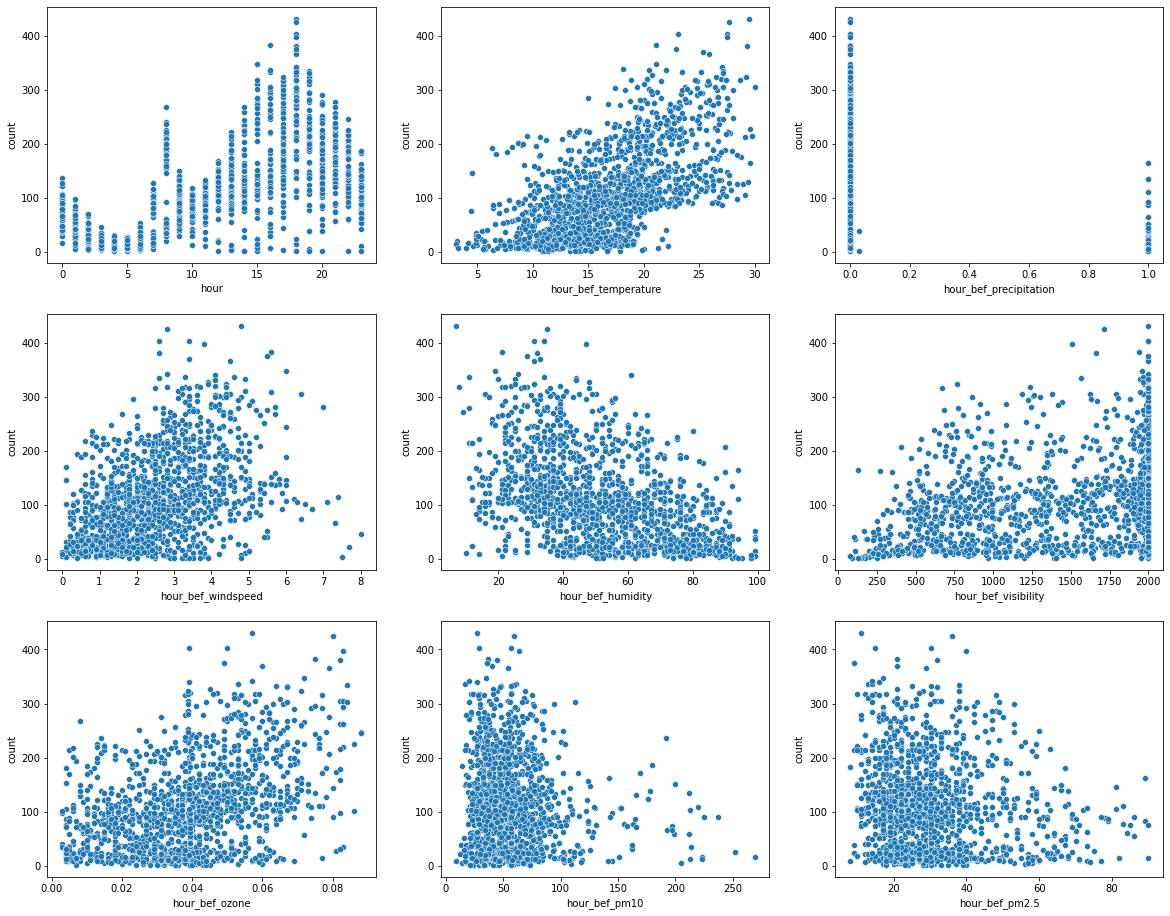

In [8]:
cat_columns = ["hour", "hour_bef_temperature", "hour_bef_precipitation", "hour_bef_windspeed", "hour_bef_humidity",
               "hour_bef_visibility", "hour_bef_ozone", "hour_bef_pm10", "hour_bef_pm2.5"]

figure, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 16))

sns.scatterplot(data = train, x = 'hour', y = 'count', ax = axes[0][0])
sns.scatterplot(data = train, x = 'hour_bef_temperature', y = 'count', ax = axes[0][1])
sns.scatterplot(data = train, x = 'hour_bef_precipitation', y = 'count', ax = axes[0][2])
sns.scatterplot(data = train, x = 'hour_bef_windspeed', y = 'count', ax = axes[1][0])
sns.scatterplot(data = train, x = 'hour_bef_humidity', y = 'count', ax = axes[1][1])
sns.scatterplot(data = train, x = 'hour_bef_visibility', y = 'count', ax = axes[1][2])
sns.scatterplot(data = train, x = 'hour_bef_ozone', y = 'count', ax = axes[2][0])
sns.scatterplot(data = train, x = 'hour_bef_pm10', y = 'count', ax = axes[2][1])
sns.scatterplot(data = train, x = 'hour_bef_pm2.5', y = 'count', ax = axes[2][2])

In [9]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    
    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')

In [10]:
outlier_iqr(train,'hour_bef_pm10')

data_hour_bef_pm10 = train[(train['hour_bef_pm10'] < upper) & (train['hour_bef_pm10'] > lower)]
len(data_hour_bef_pm10)

IQR은 31.0 이다.
lower bound 값은 -9.5 이다.
upper bound 값은 114.5 이다.
총 이상치 개수는 59 이다.


1400

C:\Users\ajtwl\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


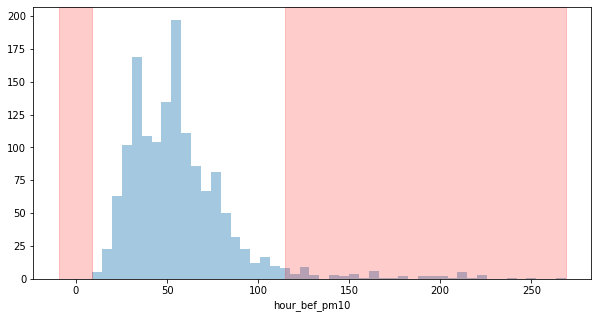

In [11]:
plt.figure(figsize=(10,5))

sns.distplot(train.hour_bef_pm10, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train.hour_bef_pm10.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train.hour_bef_pm10.max(), alpha=0.2, color='red')

In [18]:
outlier_iqr(train,'hour_bef_pm2.5')

data_hour_bef_pm2 = train[(train['hour_bef_pm2.5'] < upper) & (train['hour_bef_pm2.5'] > lower)]
len(data_hour_bef_pm2)

IQR은 15.0 이다.
lower bound 값은 -1.5 이다.
upper bound 값은 58.5 이다.
총 이상치 개수는 88 이다.


1371

In [29]:
outlier_iqr(train,'hour_bef_visibility')

data_hour_bef_visibility = train[(train['hour_bef_visibility'] < upper) & (train['hour_bef_visibility'] > lower)]
len(data_hour_bef_visibility)

IQR은 1114.0 이다.
lower bound 값은 -791.0 이다.
upper bound 값은 3665.0 이다.
총 이상치 개수는 0 이다.


1459

C:\Users\ajtwl\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


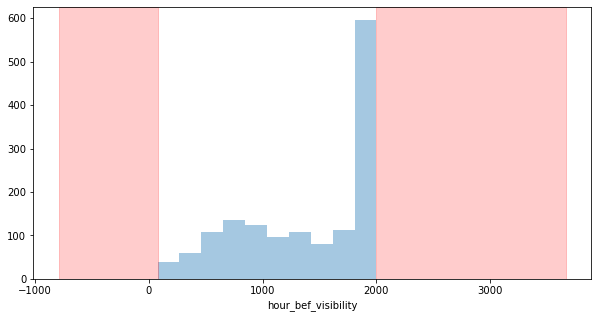

In [30]:
plt.figure(figsize=(10,5))

sns.distplot(train.hour_bef_visibility, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train.hour_bef_visibility.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train.hour_bef_visibility.max(), alpha=0.2, color='red')

## 미세먼지 이상치 제거

- hour_bef_pm10

In [20]:
train['hour_bef_pm10'] = data_hour_bef_pm10['hour_bef_pm10']

In [21]:
train['hour_bef_pm10'].isnull().sum()

59

In [22]:
train['hour_bef_pm10'].fillna(value = train.groupby('hour').mean()['hour_bef_pm10'].mean(), inplace = True)

In [23]:
train['hour_bef_pm10'].isnull().sum()

0

- hour_bef_pm2.5

In [24]:
train['hour_bef_pm2.5'] = data_hour_bef_pm2['hour_bef_pm2.5']

In [25]:
train['hour_bef_pm2.5'].isnull().sum()

88

In [26]:
train['hour_bef_pm2.5'].fillna(value = train.groupby('hour').mean()['hour_bef_pm2.5'].mean(), inplace = True)

In [27]:
train['hour_bef_pm2.5'].isnull().sum()

0

## test set

In [31]:
outlier_iqr(test,'hour_bef_pm10')

data_hour_bef_pm10 = test[(test['hour_bef_pm10'] < upper) & (test['hour_bef_pm10'] > lower)]
len(data_hour_bef_pm10)

IQR은 16.0 이다.
lower bound 값은 4.0 이다.
upper bound 값은 68.0 이다.
총 이상치 개수는 10 이다.


705

In [32]:
outlier_iqr(test,'hour_bef_pm2.5')

data_hour_bef_pm2 = test[(test['hour_bef_pm2.5'] < upper) & (test['hour_bef_pm2.5'] > lower)]
len(data_hour_bef_pm2)

IQR은 13.0 이다.
lower bound 값은 -2.5 이다.
upper bound 값은 49.5 이다.
총 이상치 개수는 12 이다.


703

## testset 미세먼지 이상치 제거

In [33]:
test['hour_bef_pm10'] = data_hour_bef_pm10['hour_bef_pm10']

In [34]:
test['hour_bef_pm10'].isnull().sum()

10

In [35]:
test['hour_bef_pm10'].fillna(value = test.groupby('hour').mean()['hour_bef_pm10'].mean(), inplace = True)

In [36]:
test['hour_bef_pm10'].isnull().sum()

0

In [37]:
test['hour_bef_pm2.5'] = data_hour_bef_pm2['hour_bef_pm2.5']

In [38]:
test['hour_bef_pm2.5'].isnull().sum()

12

In [39]:
test['hour_bef_pm2.5'].fillna(value = test.groupby('hour').mean()['hour_bef_pm2.5'].mean(), inplace = True)

In [40]:
test['hour_bef_pm2.5'].isnull().sum()

0

## 훈련 데이터 분할

In [41]:
features = ['hour', 'hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility', 
            'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']
X_train = train[features]
y_train = train['count']
X_test = test[features]

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_train.shape)

(1459, 9)
(1459,)
(1459, 9)


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [8, 16, 24],
    'min_samples_leaf': [1, 6, 12],
    'min_samples_split': [2, 8, 16]
}
rf_clf = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0: .4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고 예측 정확도:  0.7417


In [46]:
model100 = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 1, max_depth = 16, min_samples_split=2, 
                                 random_state = 0) 

model100.fit(X_train, y_train)

ypred = model100.predict(X_test)

In [47]:
submission['count'] = ypred
submission.to_csv("All_IQR.csv", index = False)